# Genome-wide Association Analysis - Data Quality Control

Copyright © 2021 Merry-Lynn McDonald, Isabelle Schrauwen & Suzanne M. Leal

## Introduction
In this exercise, you will learn how to perform data quality control (QC) by removing markers and samples that fail QC quality control criteria. You will also examine your samples for individuals that are related to each other and/or are duplicate samples. Each sample will also be tested for excess homozygosity and heterozygosity of genotype data. Each SNP will be tested for deviations from Hardy-Weinberg Equilibrium. These exercises will be carried out using PLINK1.9 and R.

## 1. Using PLINK
PLINK can upload data in different formats please see the PLINK documentation (https://www.cog-genomics.org/plink/1.9/input) for additional details. The data for this exercise is in PLINK/LINKAGE file format. There are two files: a pedfile (`GWAS.ped`) and a map file (`GWAS.map`). Please examine these files and the PLINK documentation. Please note the commands must be given in the directory where the data residues.
Navigate via the command prompt to the directory which contains the files for the exercise. Type plink in the command prompt and make note of the output. Next type:

In [1]:
cd ./Plink_DataQC

In [2]:
plink --file GWAS

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --file GWAS

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).4151516161617171818181919202020212122222223232424242525262627272728282929293030313131323233333334343535353636373737383839393940404141414242434343444445454546464747474848494949505051515252525353545454555556565657575858585959606060616162626263636464646565666666676768686869697070707171727272737374747475757676777777787879797980808181818282838383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6424 variants, 248 people).
--file: plink.bed + plink.bim + plink.fam written.353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394%


Note, that PLINK outputs a file called plink.log that contains the same output which you see on the screen. To see all options, type `plink --help` for more information. Determine how many samples there are in your data set and fill in Oval 1 of the flowchart below.

## 2. Data Quality Control

### a. Removing Samples and SNPs with Missing Genotypes.
You will exclude samples that are missing more than 10% of their genotype calls. These samples are likely to have been generated using low quality DNA and can also have higher than average genotyping error rates.

In [3]:
plink --file GWAS --mind 0.10 --recode --out GWAS_clean_mind

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GWAS_clean_mind.log.
Options in effect:
  --file GWAS
  --mind 0.10
  --out GWAS_clean_mind
  --recode

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).4151516161617171818181919202020212122222223232424242525262627272728282929293030313131323233333334343535353636373737383839393940404141414242434343444445454546464747474848494949505051515252525353545454555556565657575858585959606060616162626263636464646565666666676768686869697070707171727272737374747475757676777777787879797980808181818282838383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6424 variants, 248 people).
--file: GWAS_clean_mind-temporary.bed + GWAS_clean_mind-temporary.bim +546474849505152535455565758596061626364656667686970717273747

Examine `GWAS_clean_mind.log` to see how many samples are excluded based on this criterion and fill in Box 1.

Create two versions of your dataset, one with SNPs with a minor allele frequencies (MAFs) >5% and the other with SNPs with a MAFs <5%.

You will now remove SNPs with MAFs>5% that are missing >5% of their genotypes and then remove SNPs with MAFs<5% that are missing >1% of their genotypes. SNPs which are missing genotypes can have higher error rates than those SNP markers without missing data.

In [4]:
plink --file GWAS_clean_mind --maf 0.05 --recode --out MAF_greater_5
plink --file GWAS_clean_mind --exclude MAF_greater_5.map --recode --out MAF_less_5
plink --file MAF_greater_5 --geno 0.05 --recode --out MAF_greater_5_clean

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to MAF_greater_5.log.
Options in effect:
  --file GWAS_clean_mind
  --maf 0.05
  --out MAF_greater_5
  --recode

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161617171718181919192020212121222223232324242525252626272727282829292930303131313232333334343435353636363737383838393940404041414242424343444444454546464647474848484949505051515152525353535454555555565657575758585959596060616161626263636364646565656666676768686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6424 variants, 247 people).
--file: MAF_greater_5-temporary.bed + MAF_greater_5-temporary.bim +344454647484950515253545556575859606162636465666768697071727

Fill in Box 2a.

In [5]:
plink --file MAF_less_5 --geno 0.01 --recode --out MAF_less_5_clean

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to MAF_less_5_clean.log.
Options in effect:
  --file MAF_less_5
  --geno 0.01
  --out MAF_less_5_clean
  --recode

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161616171718181919192020212121222223232324242525252626272727282829292930303131313232333333343435353636363737383838393940404041414242424343444444454546464647474848484949505050515152525353535454555555565657575758585959596060616161626263636364646565656666676767686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (556 variants, 247 people).
--file: MAF_less_5_clean-temporary.bed + MAF_less_5_clean-temporary.bim +64748495051525354555657585960616263646566676869707172

Fill in Box 2b. Merge the two files.

In [6]:
plink --file MAF_greater_5_clean --merge MAF_less_5_clean.ped MAF_less_5_clean.map --recode --out GWAS_MAF_clean

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GWAS_MAF_clean.log.
Options in effect:
  --file MAF_greater_5_clean
  --merge MAF_less_5_clean.ped MAF_less_5_clean.map
  --out GWAS_MAF_clean
  --recode

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161617171718181919192020212121222223232324242525252626272727282829292930303131313232333334343435353636363737383838393940404041414242424343444444454546464647474848484949505051515152525353535454555555565657575758585959596060616161626263636364646565656666676768686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (5866 variants, 247 people).
--file: GWAS_MAF_clean-temporary.bed + GWAS_MAF_clean-temporary.bim +4454647484950

A more stringent criterion for missing data is used, samples missing >3% of their genotypes are removed.

In [7]:
plink --file GWAS_MAF_clean --mind 0.03 --recode --out GWAS_clean2

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GWAS_clean2.log.
Options in effect:
  --file GWAS_MAF_clean
  --mind 0.03
  --out GWAS_clean2
  --recode

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161617171718181919192020212121222223232324242525252626272727282829292930303131313232333334343435353636363737383838393940404041414242424343444444454546464647474848484949505051515152525353535454555555565657575758585959596060616161626263636364646565656666676768686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6363 variants, 247 people).
--file: GWAS_clean2-temporary.bed + GWAS_clean2-temporary.bim +14243444546474849505152535455565758596061626364656667686970717273747

Fill in Box 3.

### b. Checking Sex
Error of the reported sex of an individual can occur. Information from the SNP genotypes can be used to verify the sex of individuals, by examining homozygosity (F) on the X chromosome for every individual. F is expected to be <0.2 in females and >0.8 in males. To check sex run

In [8]:
plink --file GWAS_clean2 --check-sex --out GWAS_sex_checking

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GWAS_sex_checking.log.
Options in effect:
  --check-sex
  --file GWAS_clean2
  --out GWAS_sex_checking

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161617171718181919192020212121222223232324242525252626272727282829292930303131313232333334343435353636363737383838393940404041414242424343444444454546464647474848484949505051515152525353535454555555565657575758585959596060616161626263636364646565656666676768686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6363 variants, 247 people).
--file: GWAS_sex_checking-temporary.bed + GWAS_sex_checking-temporary.bim +7484950515253545556575859606162636465666768697071727374757

Use R to examine the GWAS_sex_checking.sexcheck file and determine if there are individuals whose recorded sex is inconsistent with genetic sex.

In [14]:
setwd('./Plink_DataQC/')

In [15]:
sexcheck = read.table("GWAS_sex_checking.sexcheck", header=T) 
names(sexcheck)
sex_problem = sexcheck[which(sexcheck$STATUS=="PROBLEM"),] 
sex_problem
q()

[1] "FID"    "IID"    "PEDSEX" "SNPSEX" "STATUS" "F"

,FID,IID,PEDSEX,SNPSEX,STATUS,F
,<fct>,<fct>,<int>,<int>,<fct>,<dbl>
163,NA20506,NA20506,2,1,PROBLEM,1.0000
181,NA20530,NA20530,2,1,PROBLEM,1.0000
202,NA20757,NA20757,2,0,PROBLEM,0.2141
208,NA20766,NA20766,2,0,PROBLEM,0.2292
212,NA20771,NA20771,2,0,PROBLEM,0.2234


NA20530 and NA20506 were coded as a female (2) and from the genotypes appear to be males (1). In addition, 3 individuals (NA20766, NA20771 and NA20757) do not have enough information to determine if they are males or females and PLINK reports sex = 0 for the genotyped sex.Fill in the table below:

<style>
    .StatgenLabel {
        font-family: "Times New Roman", Times, serif;
        font-size: 12pt;
        font-weight: bold;
    }
    .StatgenTable {
        font-size: 10pt;
        text-align: left;
    }
    .StatgenTable th {
        padding: 0px 7px 0px 7px;
    }
    .StatgenTable td {
        padding: 0px 7px 0px 7px;
    }
</style>
<span class="StatgenLabel">
    Table 1: Sex check
</span>
<table class="StatgenTable">
    <tr>
        <th width="50">FID</th>
        <th width="50">IID</th>
        <th width="50">PEDSEX</th>
        <th width="50">SNPSEX</th>
        <th width="90">STATUS</th>
        <th width="50">F</th>
    </tr>
    <tr>
        <td>NA20506</td>
        <td>NA20506</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>NA20530</td>
        <td>NA20530</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>NA20766</td>
        <td>NA20766</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>NA20771</td>
        <td>NA20771</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>NA20757</td>
        <td>NA20757</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
</table>

Reasons for these kinds of discrepancies, include the records are incorrect, incorrect data entry, sample swap, unreported Turner or Klinefelter syndromes. Additionally, if a sufficient number of SNPs have not been genotyped on the X chromosome it can be difficult to accurately predict the sex of an individual. In this dataset, there are only 194 X chromosomal SNPs. If you cannot validate the sex of the individual they should be removed. For this exercise, we are going to assume that when the sex was checked, we found it was incorrectly recorded (i.e. these samples were male). Therefore, this error could simply be corrected.

### c. Duplicate Samples

The following PLINK command can be used to check for duplicate samples

In [11]:
plink --file GWAS_clean2 --genome --out duplicates

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to duplicates.log.
Options in effect:
  --file GWAS_clean2
  --genome
  --out duplicates

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161617171718181919192020212121222223232324242525252626272727282829292930303131313232333334343435353636363737383838393940404041414242424343444444454546464647474848484949505051515152525353535454555555565657575758585959596060616161626263636364646565656666676768686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6363 variants, 247 people).
--file: duplicates-temporary.bed + duplicates-temporary.bim +04142434445464748495051525354555657585960616263646566676869707172737475767778798081828384

Open the `duplicates.genome` file in R with the following command:

In [16]:
dups = read.table("duplicates.genome", header = T)

We are interested in the Pi-Hat (the estimated proportion IBD sharing) value. You may notice that there is more than one duplicate (Pi-Hat=~1). Also, examine the output for pairs of individuals with high Pi-Hat values which can indicate they are related. The amount of allele sharing [Z(0), Z(1) and Z(2)] across all SNPs provides information on the type of relative pair.

In [17]:
problem_pairs = dups[which(dups$PI_HAT > 0.4),] 
problem_pairs

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
4138,1344,NA12057,13291,NA25001,UN,NA,0.0000,0.0025,0.9975,0.9988,-1,0.999594,1,NA
15331,1444,NA12739,1444,NA12748,OT,0,0.0026,0.9949,0.0025,0.5000,-1,0.835832,1,867
15332,1444,NA12739,1444,NA12749,OT,0,0.0026,0.9807,0.0168,0.5071,-1,0.838175,1,869
25442,M033,NA19774,M041,NA25000,UN,NA,0.0000,0.0000,1.0000,1.0000,-1,1.000000,1,NA


<style>
    .StatgenLabel {
        font-family: "Times New Roman", Times, serif;
        font-size: 12pt;
        font-weight: bold;
    }
    .StatgenTable {
        font-size: 10pt;
        text-align: left;
    }
    .StatgenTable th {
        padding: 0px 7px 0px 7px;
    }
    .StatgenTable td {
        padding: 0px 7px 0px 7px;
    }
</style>
<span class="StatgenLabel">
    Table 2: Duplicate and Related Individuals
</span>
<table class="StatgenTable">
    <tr>
        <th width="40">FID1</th>
        <th width="50">IID1</th>
        <th width="40">FID2</th>
        <th width="50">IID2</th>
        <th width="70">Z(0)</th>
        <th width="70">Z(0)</th>
        <th width="70">Z(0)</th>
        <th width="70">PI_HAT</th>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">&nbsp;</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">&nbsp;</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">&nbsp;</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">&nbsp;</td>
    </tr>
    <tr>
        <td colspan="8">
            FID1 - Family ID for 1st individual;
            ID1 - Individual ID for 1st individual;
            FID2 - Family ID for 2nd individual;
            ID2 - Individual ID for 2nd individual;
            Z(0) - P(IBD=0);
            Z(1) - P(IBD+1);
            Z(2) - P(IBD=2);
            PI_HAT - P(IBD=2)+0.5*P(IBD=1) ( proportion IBD )
        </td>
    </tr>
</table>

**Note:** Pi-hat can be inflated and individuals appear to be related to each other if you have samples from different populations. This explains why we observe pairs of individuals with Pi-hat >0.05 since threedistinctpopulationswereanalyzed. Additionally,thisphenomenoncanbeobservedifasubset(s) of samples have higher genotyping/sequencing error rates, which creates two or more “populations” and the individuals within these “populations” incorrectly appear to be related.

Using this R script please observe how many sample pairs have pi-hat >0.05:

In [18]:
problem_pairs = dups[which(dups$PI_HAT > 0.05),] 
myvars = c("FID1", "IID1", "FID2", "IID2", "PI_HAT") 
problem_pairs[myvars]

,FID1,IID1,FID2,IID2,PI_HAT
,<fct>,<fct>,<fct>,<fct>,<dbl>
26,1328,NA06984,1347,NA11882,0.0677
83,1328,NA06984,1451,NA12776,0.0546
259,1328,NA06989,1341,NA06993,0.0537
328,1328,NA06989,1451,NA12776,0.0501
344,1328,NA06989,1459,NA12875,0.0525
503,1330,NA12340,1341,NA06993,0.0671
524,1330,NA12340,1353,NA12489,0.0616
557,1330,NA12340,1423,NA11918,0.0530
565,1330,NA12340,1444,NA12750,0.0740


Create the following txt file:
```
1344 NA12057
1444 NA12739
M033 NA19774
```

name it ‘IBS_excluded.txt’ and save it to the folder with your PLINK data. Give the command:

In [21]:
%%writefile Plink_DataQC/IBS_excluded.txt
1344 NA12057
1444 NA12739
M033 NA19774

Writing Plink_DataQC/IBS_excluded.txt


In [22]:
plink --file GWAS_clean2 --remove IBS_excluded.txt --recode --out GWAS_clean3

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GWAS_clean3.log.
Options in effect:
  --file GWAS_clean2
  --out GWAS_clean3
  --recode
  --remove IBS_excluded.txt

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).41515161617171718181919192020212121222223232324242525252626272727282829292930303131313232333334343435353636363737383838393940404041414242424343444444454546464647474848484949505051515152525353535454555555565657575758585959596060616161626263636364646565656666676768686869697070707171727272737374747475757676767777787878797980808081818282828383848485858586868787878888898989909091919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6363 variants, 247 people).
--file: GWAS_clean3-temporary.bed + GWAS_clean3-temporary.bim +142434445464748495051525354555657585960616263646566676869

Fill in Box 4 and Oval 3.

As part of QC usually the data is examined for outliers by plotting the first and second principal or multidimensional scaling (MDS) components. Using a subset of markers that have been trimmed to remove LD (r2<0.5). Principal components analysis (PCA) and MDS will be performed in the
second part of the exercise to detect outliers and control for populations substructure. Outlier can be due to study subjects coming from different populations e.g. European- and African-Americans or batch effects. If it is suspected that outliers are due to study subjects having been sampled from different populations than data from HapMap can be included to elucidate population membership, e.g. for a study of European-Americans if African-American study subjects are included they would cluster between the European and African HapMap samples. If you perform this type of analysis you should remove the HapMap samples and re-estimate the MDS or PC components before adjusting for population substructure or stratification. For this exercise data is used from HapMap Phase III which consists of CEU (Europeans from Utah), MEX (Mexicans from Los Angeles) and TSI (Tuscans from Italy). Three clusters can be observed that consist of the three data sets but no extreme outliers are observed. This data set is being used for demonstration purposes. Different populations should be analyzed separately and the results can be combined using meta-analysis. In part two of this exercise MDS and PC components will be constructed and analyzed.

### d. Hardy-Weinberg Equilibrium (HWE):
To test for HWE we will test separately in each ancestry group and by case-control status. Therefore, we will need to use information on ancestry and cases-control status. Please note that this should be tested in the 3 different populations separately (CEU, MEX, TSI), but due to the small sample sizes, we tested it in the 3 populations together for example purposes. It should also be noted if the sample sizes are small it is difficult to detect a deviation from HWE.

In [24]:
plink --file GWAS_clean3 --pheno pheno.txt --pheno-name Aff --hardy

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --file GWAS_clean3
  --hardy
  --pheno pheno.txt
  --pheno-name Aff

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).51515161617171818181919202020212122222223232424242525262627272728282929293030313131323233333434343535363636373738383839394040404141424243434344444545454646474747484849494950505151525252535354545455555656565757585859595960606161616262636363646465656566666767686868696970707071717272727373747474757576767777777878797979808081818182828383848484858586868687878888888989909090919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6363 variants, 244 people).
--file: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam54647484950515253545556575859606162636465666768697071727374757677787980

Using R examine the file `plink.hwe` and look for SNPs with p-values of 10-7 or smaller.

In [25]:
hardy = read.table("plink.hwe", header = T) 
names(hardy)
hwe_prob = hardy[which(hardy$P < 0.0000009),] 
hwe_prob

[1] "CHR"    "SNP"    "TEST"   "A1"     "A2"     "GENO"   "O.HET." "E.HET."
[9] "P"

,CHR,SNP,TEST,A1,A2,GENO,O.HET.,E.HET.,P
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
622,1,rs2968487,ALL,T,C,0/124/114,0.5210,0.3853,3.877e-10
624,1,rs2968487,UNAFF,T,C,0/83/70,0.5425,0.3953,2.262e-07
787,1,rs11239985,ALL,G,A,0/111/128,0.4644,0.3566,7.625e-08
2386,2,rs12988076,ALL,C,A,69/82/93,0.3361,0.4952,6.973e-07


Using a criterion of p <10-7 to reject the null hypothesis of HWE, how many SNPs fail HWE in the controls? Fill out Oval 5 and Box 4. Using the same criteria, how many SNPs fail HWE in the controls? Complete Table 2 with this information.

<style>
    .StatgenLabel {
        font-family: "Times New Roman", Times, serif;
        font-size: 12pt;
        font-weight: bold;
    }
    .StatgenTable {
        font-size: 10pt;
        text-align: left;
    }
    .StatgenTable th {
        padding: 0px 7px 0px 7px;
    }
    .StatgenTable td {
        padding: 0px 0px 0px 0px;
    }
</style>

<span class="StatgenLabel">
    Table 3: Hardy-Weinberg Equilibrium
</span>
<table class="StatgenTable">
    <tr>
        <th colspan="3">Cases</th>
        <th colspan="3">Controls</th>
    </tr>
    <tr>
        <th style="width:40px;">SNP</td>
        <th style="width:100px;">Pvalue</td>
        <th style="width:90px;">Population(s)</td>
        <th style="width:100px;">SNP</td>
        <th style="width:100px;">Population(s)</td>
        <th style="width:120px;">Pvalue</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
</table>

Create a text file called HWE_out.txt with the following SNP in it:
```
rs2968487
```
and type the following command:

In [26]:
%%writefile Plink_DataQC/HWE_out.txt
rs2968487

Writing Plink_DataQC/HWE_out.txt


In [28]:
plink --file GWAS_clean3 --exclude HWE_out.txt --recode --out GWAS_clean4

PLINK v1.90b6.18 64-bit (16 Jun 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to GWAS_clean4.log.
Options in effect:
  --exclude HWE_out.txt
  --file GWAS_clean3
  --out GWAS_clean4
  --recode

7960 MB RAM detected; reserving 3980 MB for main workspace.
.ped scan complete (for binary autoconversion).51515161617171818181919202020212122222223232424242525262627272728282929293030313131323233333434343535363636373738383839394040404141424243434344444545454646474747484849494950505151525252535354545455555656565757585859595960606161616262636363646465656566666767686868696970707071717272727373747474757576767777777878797979808081818182828383848484858586868687878888888989909090919192929393939494959595969697979798989999100%
Performing single-pass .bed write (6363 variants, 244 people).
--file: GWAS_clean4-temporary.bed + GWAS_clean4-temporary.bim +1424344454647484950515253545556575859606162636465666768697071727374

There are a number of SNPs with HWE p-values in the range of 10-5 to 10-6 in the controls. Based on above criterion they will not be excluded however, if they reach genome-wide significance during association testing they SNPs should be further investigated to ensure there is no genotyping error. You can now fill in Box 5 and Oval 4.

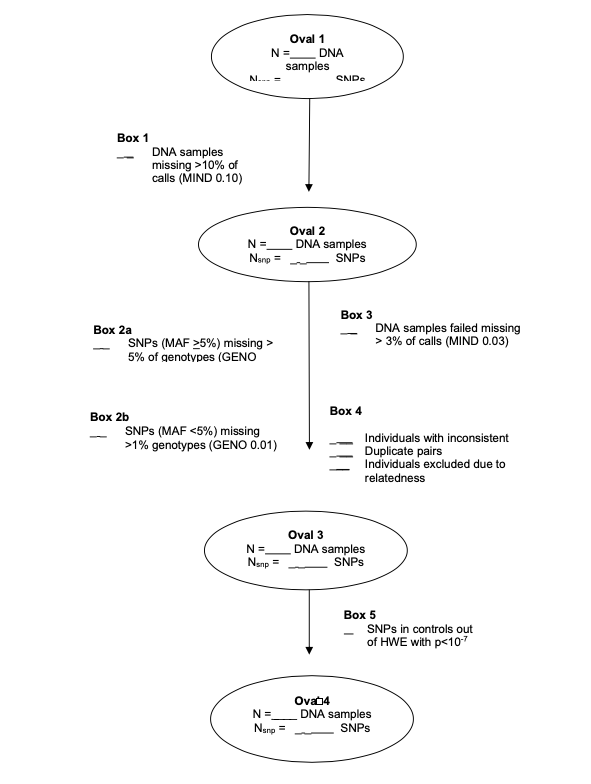

## 3. Questions

**Question 1:** Why do you expect the homozygosity rate to be higher on the X chromosome in males than females?

**Question 2:** How many duplicate pairs do your find (hint: Pi-Hat = ~1)? Do pairs with a Pi-Hat = ~1 have to be duplicate samples? What is another explanation? What proportion would you expect a parent/ child to share IBD? Can you find any such relationship?

## 4. Answers

**Answer 1:** Because males only have one allele for each SNP on the X chromosome they
  will appear homozygous.

<style>
    .StatgenLabel {
        font-family: "Times New Roman", Times, serif;
        font-size: 12pt;
        font-weight: bold;
    }
    .StatgenTable {
        font-size: 10pt;
        text-align: left;
    }
    .StatgenTable th {
        padding: 0px 7px 0px 7px;
    }
    .StatgenTable td {
        padding: 0px 7px 0px 7px;
    }
</style>
<span class="StatgenLabel">
    Table 1: Sex check
</span>
<table class="StatgenTable">
    <tr>
        <th width="50">FID</th>
        <th width="50">IID</th>
        <th width="50">PEDSEX</th>
        <th width="50">SNPSEX</th>
        <th width="90">STATUS</th>
        <th width="50">F</th>
    </tr>
    <tr>
        <td>NA20506</td>
        <td>NA20506</td>
        <td>2</td>
        <td>1</td>
        <td>PROBLEM</td>
        <td>1</td>
    </tr>
    <tr>
        <td>NA20530</td>
        <td>NA20530</td>
        <td>2</td>
        <td>1</td>
        <td>PROBLEM</td>
        <td>1</td>
    </tr>
    <tr>
        <td>NA20766</td>
        <td>NA20766</td>
        <td>2</td>
        <td>0</td>
        <td>PROBLEM</td>
        <td>0.2292</td>
    </tr>
    <tr>
        <td>NA20771</td>
        <td>NA20771</td>
        <td>2</td>
        <td>0</td>
        <td>PROBLEM</td>
        <td>0.2234</td>
    </tr>
    <tr>
        <td>NA20757</td>
        <td>NA20757</td>
        <td>2</td>
        <td>0</td>
        <td>PROBLEM</td>
        <td>0.2141</td>
    </tr>
</table>

<style>
    .StatgenLabel {
        font-family: "Times New Roman", Times, serif;
        font-size: 12pt;
        font-weight: bold;
    }
    .StatgenTable {
        font-size: 10pt;
        text-align: left;
    }
    .StatgenTable th {
        padding: 0px 7px 0px 7px;
    }
    .StatgenTable td {
        padding: 0px 7px 0px 7px;
    }
</style>
<span class="StatgenLabel">
    Table 2: Duplicate and Related Individuals
</span>
<table class="StatgenTable">
    <tr>
        <th width="40">FID1</th>
        <th width="50">IID1</th>
        <th width="40">FID2</th>
        <th width="50">IID2</th>
        <th width="70">Z(0)</th>
        <th width="70">Z(0)</th>
        <th width="70">Z(0)</th>
        <th width="70">PI_HAT</th>
    </tr>
    <tr>
        <td>M033</td>
        <td>NA19774</td>
        <td>M041</td>
        <td>NA25000</td>
        <td>0.0000</td>
        <td>0.0000</td>
        <td>1.0000</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">1.00</td>
    </tr>
    <tr>
        <td>1344</td>
        <td>NA12057</td>
        <td>13291</td>
        <td>NA25001</td>
        <td>0.0000</td>
        <td>0.0025</td>
        <td>0.9975</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">1.00</td>
    </tr>
    <tr>
        <td>1444</td>
        <td>NA12739</td>
        <td>1444</td>
        <td>NA12849</td>
        <td>0.0026</td>
        <td>0.9807</td>
        <td>0.0168</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">0.51</td>
    </tr>
    <tr>
        <td>1444</td>
        <td>NA12739</td>
        <td>1444</td>
        <td>NA12748</td>
        <td>0.0026</td>
        <td>0.9949</td>
        <td>0.0025</td>
        <td style="background-color:rgba(255, 239, 0, 0.5)">0.50</td>
    </tr>
    <tr>
        <td colspan="8">
            FID1 - Family ID for 1st individual;
            ID1 - Individual ID for 1st individual;
            FID2 - Family ID for 2nd individual;
            ID2 - Individual ID for 2nd individual;
            Z(0) - P(IBD=0);
            Z(1) - P(IBD+1);
            Z(2) - P(IBD=2);
            PI_HAT - P(IBD=2)+0.5*P(IBD=1) ( proportion IBD )
        </td>
    </tr>
</table>

**Answer 2:** There are two duplicate pairs and also a trio (two parents and a child). Parent/child relationships will have a Pi_Hat value of ~0.5, but so will sibpairs. We can tell that this is a parent child relationship by examine Z(0), Z(1) and Z(2). We will retain only one sample from each duplicate pair and the parents NA12749 and NA12748. If you perform mixed-model analysis related individuals can be retained in the sample.

<style>
    .StatgenLabel {
        font-family: "Times New Roman", Times, serif;
        font-size: 12pt;
        font-weight: bold;
    }
    .StatgenTable {
        font-size: 10pt;
        text-align: left;
    }
    .StatgenTable th {
        padding: 0px 7px 0px 7px;
    }
    .StatgenTable td {
        padding: 0px 7px 0px 7px;
    }
</style>

<span class="StatgenLabel">
    Table 3: Hardy-Weinberg Equilibrium
</span>
<table class="StatgenTable">
    <tr>
        <th colspan="2">Fail Cases</th>
        <th colspan="2">Fail Controls</th>
    </tr>
    <tr>
        <th style="width:40px;">SNP</td>
        <th style="width:50px;">pvalue</td>
        <th style="width:60px;">SNP</td>
        <th style="width:80px;">pvalue</td>
    </tr>
    <tr>
        <td>None</td>
        <td>&nbsp;</td>
        <td>rs2968487</td>
        <td style="font-family:Courier,fixed">2.262e-007</td>
    </tr>
</table>

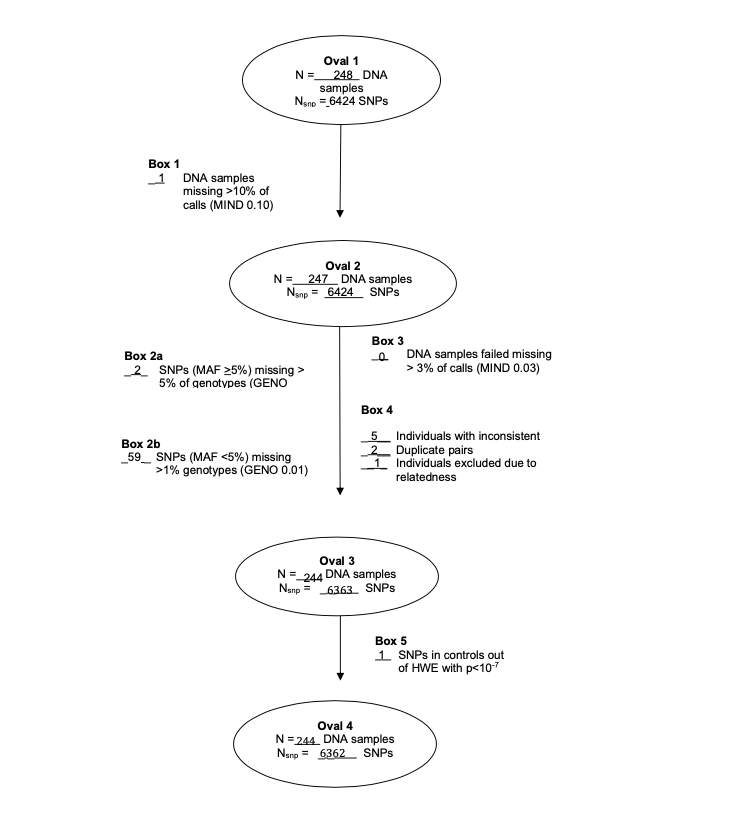